# White Box - Supervised ML Project
__Name:__ Husain Radhi

__Topic Name:__ Regression 

## Introduction
The business provided a dataset of video game sales mentioning ranks, names, publisher, genre and other columns and they want to predict the global sales of future games.

### Problem Statement
Gaming company "Passionless gaming" needs to predict which video games will be successful in the global market to optimize their development and marketing investments. Their aim is to find the optimal factors that would greatly increase the likelihood of high global sales for a game.


### Objectives
List the key questions guiding your analysis and modeling:
- What features influence the target variable?
- Can feature engineering improve model performance?
- How do different model versions compare?
- Is regression a viable approach to predict sales using this dataset?


## Data Overview
__Load and inspect the dataset__



In [142]:
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
import numpy as np

In [144]:
vg_df = pd.read_csv("vgsales.csv")

In [145]:
vg_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


y= global_sales

In [146]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [147]:
vg_df.isnull().sum() 

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [148]:
vg_df[vg_df["Publisher"]=="Nintendo"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


#### I will delete the year column as it has too many nulls and it is not useful in linear regression, but the publisher can be useful, as such I will only delete the null rows in the publisher column

## Data Cleaning
__Handle missing values, outliers, and inconsistencies__
- Rename columns
- Fix data types
- Document assumptions


In [149]:
vg_df.drop(columns = ["Year"], inplace = True)

In [150]:
vg_df.dropna(inplace = True)

In [151]:
vg_df.head()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [152]:
vg_df[vg_df["Publisher"]=="Nintendo"]

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [153]:
vg_df[vg_df["Global_Sales"] == 0] #no 0 values

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [154]:
vg_df=vg_df[~(vg_df["Global_Sales"] > 10)] # will remove anything about 10 million as they are outliers

In [155]:
vg_df

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
62,63,Halo: Reach,X360,Shooter,Microsoft Game Studios,7.03,1.98,0.08,0.78,9.88
63,64,Mario Kart 64,N64,Racing,Nintendo,5.55,1.94,2.23,0.15,9.87
64,65,New Super Mario Bros. 2,3DS,Platform,Nintendo,3.66,3.07,2.47,0.63,9.82
65,66,Halo 4,X360,Shooter,Microsoft Game Studios,6.63,2.36,0.04,0.73,9.76
66,67,Final Fantasy VII,PS,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [156]:
vg_df=vg_df[~(vg_df["Global_Sales"] == 0.01)] # will remove all values at 0.01, as they are inaccurate and can be considered outliers

In [157]:
vg_df.isnull().sum()

Rank            0
Name            0
Platform        0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [158]:
vg_df["Platform"].value_counts() #we will look at the platforms with low counts and delete them

Platform
PS2     2087
DS      2057
PS3     1290
Wii     1285
X360    1221
PS      1184
PSP     1119
PC       851
XB       808
GBA      764
GC       543
3DS      480
PSV      365
PS4      323
N64      316
SNES     236
XOne     199
SAT      173
WiiU     137
2600     133
NES       95
GB        92
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [159]:
counts= vg_df["Platform"].value_counts()

In [160]:
filtered_platforms= counts[counts>=60].index # this code will remove any platforms that have less than 60 counts, and show the index which is the platforms

In [161]:
vg_df= vg_df[vg_df["Platform"].isin(filtered_platforms)]

In [162]:
vg_df["Platform"].unique() # to check, anything below GB was deleted

array(['X360', 'N64', '3DS', 'PS', 'PS3', 'Wii', 'SNES', 'DS', 'PS4',
       'XB', 'PC', 'PS2', '2600', 'PSP', 'NES', 'XOne', 'GC', 'WiiU',
       'GBA', 'GB', 'PSV', 'SAT'], dtype=object)

In [163]:
vg_df["Genre"].unique() #Let's look at that the genre column now

array(['Shooter', 'Racing', 'Platform', 'Role-Playing', 'Misc',
       'Simulation', 'Sports', 'Action', 'Puzzle', 'Fighting',
       'Adventure', 'Strategy'], dtype=object)

In [164]:
vg_df["Genre"].value_counts() #They all have sufficient values so we can skip this column

Genre
Action          3188
Sports          2275
Misc            1646
Role-Playing    1424
Shooter         1261
Racing          1192
Adventure       1118
Platform         847
Simulation       834
Fighting         792
Strategy         637
Puzzle           544
Name: count, dtype: int64

In [165]:
vg_df["Publisher"].unique() #There are many, so let's count them

array(['Microsoft Game Studios', 'Nintendo',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', 'Take-Two Interactive', '505 Games', 'Capcom',
       'GT Interactive', 'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Midway Games', 'JVC', 'Deep Silver', '989 Studios', 'NCSoft',
       'UEP Systems', 'Parker Bros.', 'Maxis', 'Imagic', 'Tecmo Koei',
       'Valve Software', 'ASCII Entertainment', 'Mindscape', 'Infogrames',
 

In [166]:
vg_df["Publisher"].nunique() #This will be a difficult column to deal with, let's create a model without it first then add it later to test

550

In [167]:
pub_counts=vg_df["Publisher"].value_counts()

In [168]:
filtered_pub=pub_counts[pub_counts>2].index #I decreased the number of columns by removing any publisher that did not release more than 3 games


In [169]:
vg_df=vg_df[vg_df["Publisher"].isin(filtered_pub)]

In [170]:
vg_df["Publisher"].value_counts()

Publisher
Electronic Arts                 1339
Activision                       952
Ubisoft                          899
Namco Bandai Games               893
Konami Digital Entertainment     812
                                ... 
Princess Soft                      3
TGL                                3
7G//AMES                           3
Yuke's                             3
Licensed 4U                        3
Name: count, Length: 306, dtype: int64

In [171]:
vg_df.shape

(15457, 10)

## Exploratory Data Analysis (EDA)
### Analysis
__Answer objectives using visual and statistical insights__
- Trends, relationships, anomalies
- Outlier and missing values treatment
- Univariate, bivariate, or multivariate analysis
    - Histograms, box plots, bar charts
    - Correlation matrix for continuous columns (required if applicable)


Text(0, 0.5, 'Frequency')

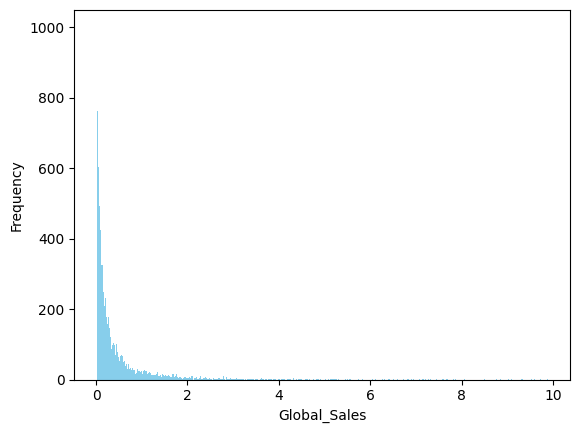

In [172]:
plt.hist(vg_df["Global_Sales"], bins = 1000, color= "skyblue") #this is the old histogram with outliers
plt.xlabel("Global_Sales")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

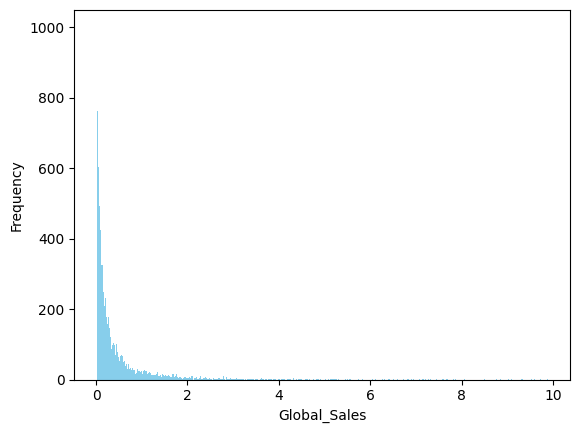

In [173]:
plt.hist(vg_df["Global_Sales"], bins = 1000, color= "skyblue") #this is the new histogram without outliers, we can see (predictably) that frequency of low sales are really high and get lower as sales go up
plt.xlabel("Global_Sales")
plt.ylabel("Frequency")

In [174]:
vg_df

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
62,63,Halo: Reach,X360,Shooter,Microsoft Game Studios,7.03,1.98,0.08,0.78,9.88
63,64,Mario Kart 64,N64,Racing,Nintendo,5.55,1.94,2.23,0.15,9.87
64,65,New Super Mario Bros. 2,3DS,Platform,Nintendo,3.66,3.07,2.47,0.63,9.82
65,66,Halo 4,X360,Shooter,Microsoft Game Studios,6.63,2.36,0.04,0.73,9.76
66,67,Final Fantasy VII,PS,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
...,...,...,...,...,...,...,...,...,...,...
15975,15978,You Don't Know Jack,PC,Misc,Vivendi Games,0.01,0.00,0.00,0.00,0.02
15976,15979,Ouran Koukou Host Bu,PS2,Adventure,Idea Factory,0.00,0.00,0.02,0.00,0.02
15977,15980,Lotus Challenge,GC,Racing,Ignition Entertainment,0.01,0.00,0.00,0.00,0.02
15978,15981,Meiji Toukyou Renka: Twilight Kiss,PSP,Action,Broccoli,0.00,0.00,0.02,0.00,0.02


In [175]:
vg_df["new_global_sales"]= vg_df["NA_Sales"]+ vg_df["EU_Sales"] + vg_df["JP_Sales"] + vg_df["Other_Sales"]


In [176]:
vg_df[["Global_Sales", "new_global_sales"]]

,Global_Sales,new_global_sales
62,9.88,9.87
63,9.87,9.87
64,9.82,9.83
65,9.76,9.76
66,9.72,9.72
...,...,...
15975,0.02,0.01
15976,0.02,0.02
15977,0.02,0.01
15978,0.02,0.02


In [177]:
vg_df["Difference_between_sales"]= vg_df["Global_Sales"]-vg_df["new_global_sales"]

In [178]:
vg_df[vg_df["Difference_between_sales"]>0.01]

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,new_global_sales,Difference_between_sales
62,63,Halo: Reach,X360,Shooter,Microsoft Game Studios,7.03,1.98,0.08,0.78,9.88,9.87,0.01
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58,7.57,0.01
97,98,Super Smash Bros. for Wii U and 3DS,3DS,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45,7.44,0.01
101,102,Call of Duty: Black Ops 3,XOne,Shooter,Activision,4.52,2.09,0.01,0.67,7.30,7.29,0.01
107,108,Super Smash Bros. Melee,GC,Fighting,Nintendo,4.41,1.04,1.39,0.22,7.07,7.06,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
14078,14080,NHRA Drag Racing: Countdown to the Championship,PS2,Racing,THQ,0.02,0.01,0.00,0.00,0.04,0.03,0.01
14081,14083,Puyo Pop Fever(us sales),DS,Puzzle,Ignition Entertainment,0.03,0.00,0.00,0.00,0.04,0.03,0.01
14088,14090,FunkMaster Flex's Digital Hitz Factory,PS2,Misc,Jester Interactive,0.02,0.01,0.00,0.00,0.04,0.03,0.01
14090,14092,Greg Hastings Paintball 2,PS3,Shooter,Majesco Entertainment,0.03,0.00,0.00,0.00,0.04,0.03,0.01


In [179]:
vg_df.duplicated().sum() #to check if there are duplicates

np.int64(0)

### Data Handling for Modeling
- __Transform, encode, and prepare features__
    - Categorical encoding
    - Feature scaling (especially for KNN)


#### Let's use hot encoding to the Platform and Genre columns

#### We need to define X and y first

#### First Linear Regression model preprocessing

In [191]:
X= vg_df[["Platform", "Genre", "Publisher"]]
y= vg_df["Global_Sales"]

In [192]:
X= pd.get_dummies( columns = ["Platform", "Genre", "Publisher"], drop_first = True, data=X)
display(X) #just to check

,Platform_3DS,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_N64,Platform_NES,Platform_PC,Platform_PS,Platform_PS2,...,Publisher_Xplosiv,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Yeti,Publisher_Yuke's,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create
62,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15975,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
15976,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
15977,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15978,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Model Building
__Build and compare two models for your topic__
### Model 1: Linear / Logistic Regression
- Version 1: baseline
- Version 2: modified features or tuned parameters


In [232]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [195]:
lr = LinearRegression()

In [196]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [197]:
lr.coef_

array([-4.74659527e-01, -4.87790912e-01, -1.34625120e-01, -5.76874980e-01,
       -6.24536894e-01, -2.90746708e-01,  4.40862020e-01, -6.07816799e-01,
       -2.17450570e-01, -2.63787968e-01, -1.84670175e-01, -6.45091748e-02,
       -4.76800544e-01, -5.08191766e-01, -5.14607979e-01, -1.55574580e-01,
       -3.35228245e-01, -6.22019512e-01, -2.16116823e-01, -6.20918934e-01,
       -2.77602084e-01, -1.26294842e-01,  1.15782245e-01, -6.85287313e-02,
        1.25506647e-01, -9.68902287e-02,  1.88430522e-02,  1.00266226e-01,
        1.06292064e-01, -1.10272978e-02, -7.14558544e-02, -1.28035927e-01,
       -3.05253990e-01, -1.23250737e-01,  1.26570612e-02, -1.85695784e-01,
       -2.05643747e-01,  4.64463744e-01, -1.65591306e-01, -3.70754927e-02,
        1.76114460e-01, -6.01641556e-02,  5.22497075e-02, -2.64828816e-01,
       -1.69848509e-01, -2.73558897e-01,  3.16887777e-01, -3.16195557e-02,
       -5.21819507e-02, -5.80422653e-02, -1.87476930e-01, -1.34092788e-01,
       -1.74562798e-01,  

In [198]:
lr.intercept_

np.float64(0.6452539895072651)

In [199]:
y_predict = lr.predict(X_test)

In [200]:
test_rmse = metrics.root_mean_squared_error(y_test, y_predict)
test_r2 = metrics.r2_score(y_test,y_predict)

In [201]:
print("test_rmse: ", test_rmse)
print("test_r2: ", test_r2)

test_rmse:  0.8661951807151159
test_r2:  0.1775801039283289


#### The model is not great, as such we will try adding a new feature (NA Sales).

#### Second regression model preprocessing

In [203]:
X2 = vg_df[["Platform", "Genre", "Publisher", "NA_Sales"]]
y2 = vg_df["Global_Sales"]

In [204]:
X2= pd.get_dummies( columns = ["Platform", "Genre", "Publisher"], drop_first = True, data=X2)
display(X2)

,NA_Sales,Platform_3DS,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_N64,Platform_NES,Platform_PC,Platform_PS,...,Publisher_Xplosiv,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Yeti,Publisher_Yuke's,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create
62,7.03,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63,5.55,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64,3.66,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65,6.63,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66,3.01,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15975,0.01,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
15976,0.00,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15977,0.01,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15978,0.00,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Model 1: Linear / Logistic Regression Version 2

In [206]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=100)

In [295]:
lr2 = LinearRegression()

In [296]:
lr2.fit(X2_train, y2_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [297]:
y2_predict = lr2.predict(X2_test)

In [298]:
test_rmse_2 = metrics.root_mean_squared_error(y2_test, y2_predict)
test_r2_2 = metrics.r2_score(y2_test,y2_predict)

In [299]:
print("test_rmse: ", test_rmse_2)
print("test_r2: ", test_r2_2)

test_rmse:  0.3900160469663342
test_r2:  0.8332648999667915


#### Let's try removing te publisher feature as it may add a lot of noise

In [217]:
X3= vg_df[["Platform", "Genre", "NA_Sales" ]]
y3= vg_df["Global_Sales"]

In [218]:
X3= pd.get_dummies( columns = ["Platform", "Genre"], drop_first = True, data=X3)
display(X3) #just to check

,NA_Sales,Platform_3DS,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_N64,Platform_NES,Platform_PC,Platform_PS,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
62,7.03,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
63,5.55,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
64,3.66,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
65,6.63,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
66,3.01,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15975,0.01,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
15976,0.00,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15977,0.01,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
15978,0.00,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [219]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=100)

In [220]:
lr3 = LinearRegression()

In [221]:
lr.fit(X3_train, y3_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [222]:
y3_predict = lr.predict(X3_test)

In [223]:
test_rmse_3 = metrics.root_mean_squared_error(y3_test, y3_predict)
test_r2_3 = metrics.r2_score(y3_test,y3_predict)

In [224]:
print("test_rmse: ", test_rmse_3)
print("test_r2: ", test_r2_3) #seems like the second model was better, meaning the publisher feature was actually useful.

test_rmse:  0.39853478679184506
test_r2:  0.8259016908990535


### Model 2: KNN Regressor



In [225]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [227]:
scaler = StandardScaler()

In [228]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [230]:
knr = KNeighborsRegressor()

In [233]:
cross_val_score(knr, X_train_scaled, y_train, cv=10).mean() #This is using the first model's features which were bad in linear regression as well.

np.float64(0.041540807338903384)

In [275]:
knr.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [276]:
predict= knr.predict(X_test_scaled)

In [278]:
knr.score(X_test_scaled, y_test) #It's garbage as expected

0.09852756752851843

#### No point in training using this dataset, so we will choose the second dataset now

In [234]:
scaler = StandardScaler()

In [235]:
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [236]:
knr2 = KNeighborsRegressor()

In [237]:
cross_val_score(knr2, X2_train_scaled, y2_train, cv=10).mean() #Not an amazing score but better than the first

np.float64(0.5882404664736969)

In [238]:
knr2.fit(X2_train_scaled, y2_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [240]:
predict_2= knr2.predict(X2_test_scaled)

In [242]:
knr2.score(X2_test_scaled, y2_test)

0.6064849405553605

In [241]:
predict_2

array([0.27 , 0.688, 1.858, ..., 0.792, 0.708, 0.796], shape=(3865,))

#### Let's use a different k value

In [268]:
knr2 = KNeighborsRegressor(n_neighbors= 3)

In [269]:
knr2.fit(X2_train_scaled, y2_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [270]:
predict_2= knr2.predict(X2_test_scaled)

In [271]:
knr2.score(X2_test_scaled, y2_test) #After doing some testing, going higher than k=3 decreases the accuracy so we will stick to 3

0.6112011950334919

### Model Evaluation
__Use appropriate metrics based on task type and compare between the Models and their versions__

__For Regression:__
- R² Score
- Root Mean Squared Error (RMSE)
- Residual plots


#### I will only evaluate the useful models (Linear Regression v2 and KNearestRegressor v2)

##### Linear Regression model evaluation

In [303]:
y2_train_predict= lr2.predict(X2_train)

In [304]:
test_rmse_2 = metrics.root_mean_squared_error(y2_test, y2_predict)
train_r2_2 = metrics.r2_score(y2_train, y2_train_predict)
test_r2_2 = metrics.r2_score(y2_test,y2_predict)

In [305]:
print("test_rmse: ", test_rmse_2)
print("train_r2: ", train_r2_2)
print("test_r2: ", test_r2_2)

test_rmse:  0.3900160469663342
train_r2:  0.8384963300683865
test_r2:  0.8332648999667915


#### The R2 values are very close, so there is no overfitting or underfitting

In [288]:
lr_resids = y2_test - y2_predict
lr_resids

6606     0.000535
1510     0.210484
758      0.944081
9577    -0.071677
1415     0.029593
           ...   
9046     0.089139
12040   -0.063150
3834    -0.262093
5802    -0.016646
3427    -0.386710
Name: Global_Sales, Length: 3865, dtype: float64

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 4.000e+00, 4.000e+00, 3.000e+00,
        1.000e+01, 9.000e+00, 8.000e+00, 1.800e+01, 1.900e+01, 3.800e+01,
        6.300e+01, 1.220e+02, 2.910e+02, 6.010e+02, 1.084e+03, 8.380e+02,
        3.080e+02, 1.250e+02, 7.100e+01, 3.700e+01, 2.900e+01, 2.600e+01,
        2.100e+01, 1.500e+01, 1.300e+01, 1.500e+01, 8.000e+00, 9.000e+00,
        1.500e+01, 6.000e+00, 4.000e+00, 7.000e+00, 3.000e+00, 2.000e+00,
        6.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

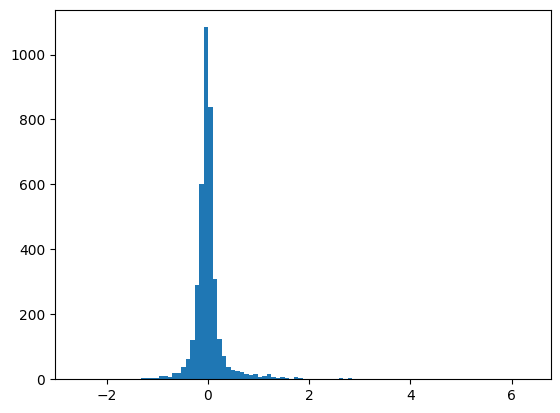

In [289]:
plt.hist(lr_resids, bins =100) #the residuals are normally distributed

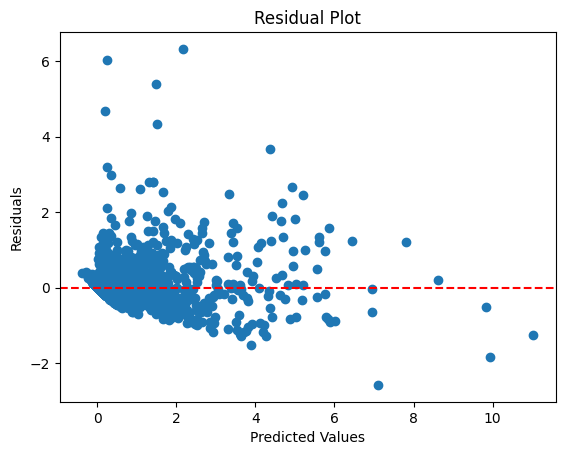

In [290]:
plt.scatter(y2_predict, lr_resids)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show() #It is not fully random

In [291]:
predict_train_2= knr2.predict(X2_train_scaled)

In [292]:
test_rmse_knr = metrics.root_mean_squared_error(y2_test, predict_2)
train_r2_knr = metrics.r2_score(y2_train,predict_train_2)
test_r2_knr = metrics.r2_score(y2_test,predict_2)

In [293]:
print("test_rmse: ", test_rmse_knr)
print("train_r2: ", train_r2_knr)
print("test_r2: ", test_r2_knr) #seems like the second model was better, meaning the publisher feature was actually useful.

test_rmse:  0.5955680887038068
train_r2:  0.836771798385036
test_r2:  0.6112011950334919


#### There is overfitting in the model as the train_r2 is >> test_r2

In [282]:
knr_resids = y2_test - predict_2
knr_resids

6606    -0.010000
1510     0.520000
758      0.073333
9577    -0.010000
1415     0.720000
           ...   
9046     0.003333
12040   -0.120000
3834    -0.460000
5802    -0.510000
3427    -0.436667
Name: Global_Sales, Length: 3865, dtype: float64

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 6.000e+00, 5.000e+00, 3.000e+00, 3.000e+00,
        8.000e+00, 8.000e+00, 7.000e+00, 1.500e+01, 2.300e+01, 3.000e+01,
        3.400e+01, 5.100e+01, 1.010e+02, 1.510e+02, 2.760e+02, 5.970e+02,
        1.206e+03, 4.410e+02, 2.130e+02, 1.320e+02, 8.100e+01, 6.400e+01,
        6.900e+01, 3.700e+01, 3.300e+01, 2.600e+01, 2.300e+01, 2.500e+01,
        1.900e+01, 1.300e+01, 2.200e+01, 8.000e+00, 8.000e+00, 9.000e+00,
        4.000e+00, 9.000e+00, 2.000e+00, 6.000e+00, 3.000e+00, 3.000e+00,
        6.000e+00, 9.000e+00, 4.000e+00, 6.000e+00, 1.000e+00, 4.000e+00,
        1.000e+00, 6.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 0.000e+00,
        4.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

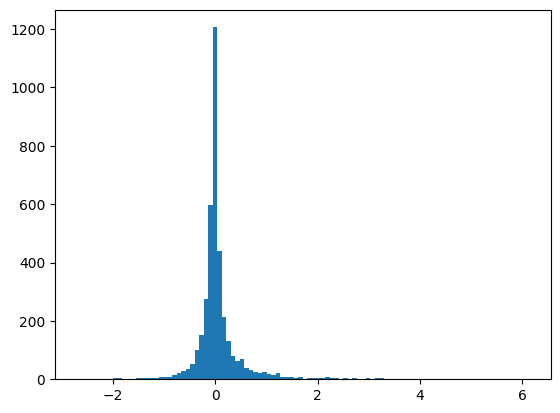

In [284]:
plt.hist(knr_resids, bins =100) #the residuals are normally distributed

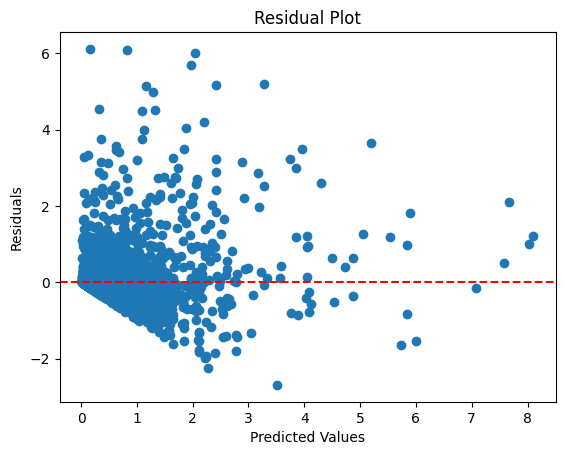

In [285]:
plt.scatter(predict_2, knr_resids)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show() #there is a pattern in the residuals which means that the model is not great

### Model Comparison
- The second linear regression model performed best. KNearestRegressor models were not great (unsurprisingly). However, it only worked well when we added the NA_Sales value which defeats the point.
- Adding more features improved the performance of the model, the features are: Publisher, Genre, Platform and NA_Sales. The impact of NA_Sales is the largest but in reality, if we already have the NA_Sales, then the whole model is relatively useless.
- There is overfitting in the KNR model. The residuals plot do not show complete randomness in the linear regression model.


## Final Model & Insights

- If I had to choose one model, I would choose the linear regression model with the sales column. However, in reality, it is not very useful considering we need a sales value to predict global sales.
- The nature of the dataset and prediction do not make it feasible to use regression. For example, there are so many variables that could affect the success of a video game and they are more than the general ones like genre, platform and publisher. Sentiment around these variables change over time and video game development takes time. You may create a model, predict something but in 4 years (which is the average development time for a video game) the new data may show a completely different landscape.
- We could have explored more model options (CatBoost or RandomForestRegressor), but couldn't due to time constraints. However, no matter the model, this dataset wouldn't work for this kind of prediction. You would need more in depth data about more specific factors related to video games to actually make a reasonable prediction. 
